In [2]:
from fears.population import Population
from fears.utils import plotter, fitness
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def logistic_equation(conc,drugless_rate,ic50,hc=-0.6824968):
    """
    Logistic equation from ogbunugafor et al, PLOS CB, 2016

    Parameters
    ----------
    dugless_rate : float
        Drugless growth rate of genotype.
    ic50 : float
        ic50 of genotype.
    conc : float
        Drug concentration (in Molarity (M)).
    hc : float, optional
        Logistic curve steepness parameter. The default is -0.6824968.

    Returns
    -------
    f : float
        Replication rate.

    """
    
    # conc = conc/10**6
    f = drugless_rate/(1+np.exp((ic50-np.log10(conc))/hc))
    
    return f

In [4]:
drug_conc_range = [-3,5]
p = Population(fitness_data='random',
               death_model=None,
               n_allele=2,
               death_rate=0.1,
               drug_conc_range = drug_conc_range,
               ic50_limits=[-2.5,3],
               drugless_limits=[0.8,1.5])

p.drugless_rates = [1.28949852, 1.14399848, 1.22802236, 0.93619847]
p.ic50 = [-0.49205992, 1.76224515,  1.39341393,  2.84653598]

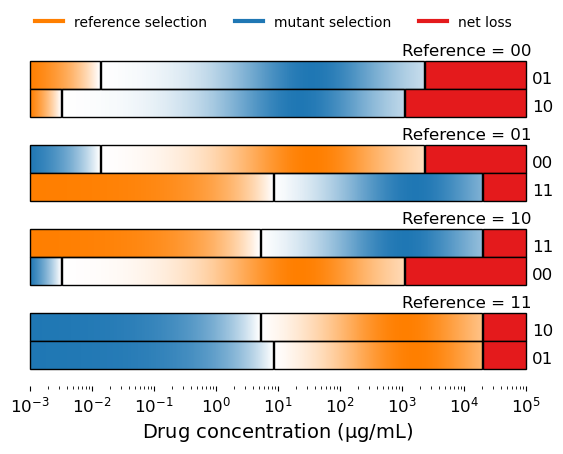

In [5]:
fig,ax = plt.subplots() 

genotypes = np.array([0,1,2,3])
ax = plotter.msw_grid(p,genotypes,ax=ax,
                      labelsize=12,
                      ticklabelsize=12,
                      comp_annotate_pos=10**5.1,
                      legendloc=(0,0.95))

ax.set_xlabel('Drug concentration ($\mathrm{\mu}$g/mL)',fontsize=14)
fig.savefig('figures/2_allele_grid.png',bbox_inches='tight',dpi=400)

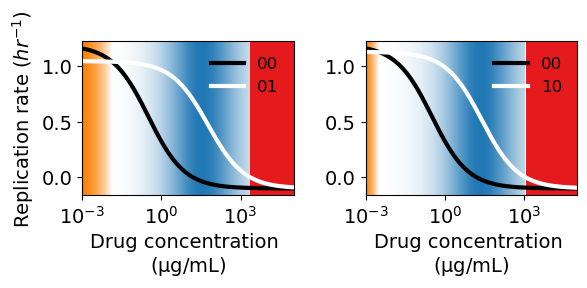

In [6]:
fig2, ax = plotter.plot_msw(p,0,ncols=2,figsize=(6,2))

# for a in ax:
#     a.yaxis.tick_right()
ax[0].set_ylabel('Replication rate ($hr^{-1}$)',fontsize=14)
ax[0].yaxis.set_label_position("left")
ax[1].set_ylabel('')
fig2.savefig('figures/2_allele_msws.png',bbox_inches='tight',dpi=400)

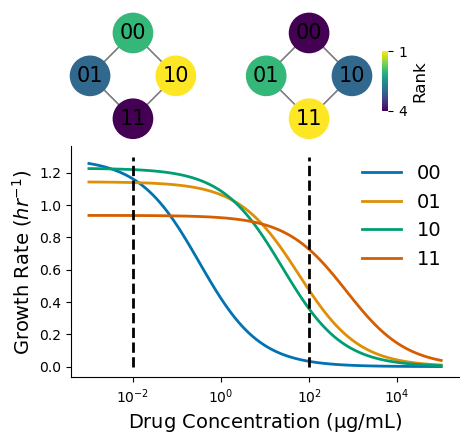

In [7]:
fig3,ax = plt.subplots(figsize=(5,3))

cmap = sns.color_palette("colorblind", as_cmap=True)[0:4]

drug_conc = np.logspace(drug_conc_range[0],drug_conc_range[1],100)

for i in range(4):
    y = logistic_equation(drug_conc,p.drugless_rates[i],p.ic50[i])
    ax.plot(drug_conc,y,label=p.int_to_binary(i),color=cmap[i],linewidth=2)

ax.set_xscale('log')

vert_lines_ydata = [0,1.3]

ax,lax1 = plotter.add_landscape_to_fitness_curve(10**-2,ax,p,square=True,
                                                 ypos=0.3,colorbar=False,
                                                 vert_lines_ydata=vert_lines_ydata,
                                                 vert_lines_kwargs={'linewidth':2},
                                                 textsize=15)

ax,lax2 = plotter.add_landscape_to_fitness_curve(10**2,ax,p,square=True,
                                                 ypos=0.3,colorbar=True,
                                                 vert_lines_ydata=vert_lines_ydata,
                                                 vert_lines_kwargs={'linewidth':2},
                                                 cbloc=[0.8,0.22,0.3,0.5],textsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='best',frameon=False,fontsize=14)

ax.set_ylabel('Growth Rate ($hr^{-1}$)',fontsize=14)
ax.set_xlabel('Drug Concentration ($\mathrm{\mu}$g/mL)',fontsize=14)

fig3.savefig('figures/random_seascape.eps',bbox_inches='tight',dpi=400)